### Load Data

In [1]:
import pandas as pd
import re
from datetime import datetime

courses_prices = pd.read_csv('./Data/course_prices.csv')
courses = pd.read_csv('./Data/Coursera_courses.csv')
users = pd.read_csv('./Data/Coursera_reviews.csv')
courses_metadata = pd.read_csv('./Data/CourseraDataset-Unclean.csv')
job_skills = pd.read_csv('./Data/job_skills.csv')
job_metadata = pd.read_csv('./Data/linkedin_job_postings.csv')
course_desc_1 = pd.read_csv('./Data/coursera_course_dataset_v3.csv')
course_desc_2 = pd.read_csv('./Data/coursera_courses (2).csv')

In [2]:
courses

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training
...,...,...,...,...
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution


In [3]:
users

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
...,...,...,...,...,...
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


In [4]:
courses_metadata

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9590,Power Onboarding,4.1,Beginner level,Approx. 7 hours to complete,Flexible schedule,36 reviews,NaN,[],"['Week 1 - Get Ready', 'Session 2 - Get Set', ...",['William J. White'],['Northwestern University'],Social Sciences,https://www.coursera.org/learn/power-onboarding
9591,Implementing Parent Feedback with Google Forms,4.9,Beginner level,NaN,NaN,77 reviews,Creating engaging parent surveys using Google ...,"['Education', 'online tools', 'engagement', 'e...",['Learn step-by-step'],['Rachel Lindsay'],['Coursera Project Network'],Social Sciences,https://www.coursera.org/projects/education-fe...
9592,"""Making"" Progress Teach-Out",4.2,Beginner level,Approx. 5 hours to complete,Flexible schedule,10 reviews,NaN,[],"['Week 1', 'WEEK 2']",['Pablo Palomino'],['Emory University'],Social Sciences,https://www.coursera.org/learn/makingprogress
9593,Use Microsoft PowerPoint to Create a Visual Sc...,4.5,Beginner level,1 hour,NaN,11 reviews,Learn about choice boards and their use within...,"['Teaching tools', 'elementary teaching', 'eng...",['Learn step-by-step'],['Rachel Lindsay'],['Coursera Project Network'],Social Sciences,https://www.coursera.org/projects/use-microsof...


In [5]:
job_metadata

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348449,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,t,t,f,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite
1348450,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,t,t,f,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite
1348451,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,t,t,f,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite
1348452,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,t,t,f,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite


In [6]:
job_skills

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."
...,...,...
1296376,https://www.linkedin.com/jobs/view/community-a...,"Communication Skills, Time Management, Custome..."
1296377,https://www.linkedin.com/jobs/view/sr-it-analy...,"Windows SQL, EDI X12, Edifecs Platform, Health..."
1296378,https://www.linkedin.com/jobs/view/operations-...,"Adaptability, Communication, Digital Fluency, ..."
1296379,https://www.linkedin.com/jobs/view/float-patie...,"CNA, EMT, BLS, Medical Assistant, CPCT, LPN, R..."


### Remove Duplicate Courses

In [7]:
courses_metadata.rename(columns={'Course Title': 'name', 'Rating': 'Overall Ratings', 'Review': 'Num of Reviews', 'Offered By': 'institution'}, inplace = True)
courses_metadata.drop_duplicates(subset=['name'], inplace=True)

### Remove Duplicate Reviews

In [8]:
users.drop_duplicates(subset=['reviews', 'reviewers', 'course_id'], inplace=True)

### Handle Null Values

In [9]:
#print(job_skills.isnull().sum())
#print(courses.isnull().sum())
#print(users.isnull().sum())
job_skills = job_skills.dropna(subset=['job_skills'])

### Reviews Preprocessing

In [10]:
import re

users['reviews'] = users['reviews'].astype(str)

# Remove rows where 'reviews' only contains punctuation
users = users[users['reviews'].str.contains(r'\w', regex=True)]

# Remove rows where 'reviews' contains emojis
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
users = users[~users['reviews'].apply(lambda x: bool(emoji_pattern.search(x)))]

# Remove rows where 'reviews' contains emails or websites
users = users[~users['reviews'].str.contains(r'\S*@\S*\s?|http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', regex=True)]
users


,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
...,...,...,...,...,...
1454636,amazing,By FANISHA A A,"Oct 10, 2020",5,computer-networking
1454639,great,By Ilona Y Z,"Oct 07, 2020",5,computer-networking
1454642,Nice,By Aung T K,"Oct 10, 2020",5,computer-networking
1454643,Good,By Anthony N S,"Oct 08, 2020",5,computer-networking


### Merge Courses with Users by course_id

In [11]:
temp = pd.merge(users, courses, on="course_id", how="inner")
#temp.head()

### Merge Courses with additional dataset to get missing descriptions

In [12]:
### course_desc_1
course_desc_1 = course_desc_1.loc[(course_desc_1['course_description'].notna())]
course_desc_1 = course_desc_1[['Title', 'Skills', 'course_description']]

### course_desc_2
course_desc_2 = course_desc_2.loc[(course_desc_2['course_description'].notna())]
course_desc_2 = course_desc_2[['course_title', 'course_skills', 'course_description']]

In [13]:
description_temp = pd.merge(courses_metadata, course_desc_1, left_on="name", right_on="Title", how="left")
description_temp = description_temp.drop(columns=['Title'])
description_temp = pd.merge(description_temp, course_desc_2, left_on="name", right_on="course_title", how="left")
description_temp = description_temp.drop(columns=['course_title'])

### Merging descriptions

In [14]:
def merge_description(row):

    x = row['What you will learn'] if pd.notna(row['What you will learn']) else ''
    y = row['course_description_y'] if pd.notna(row['course_description_y']) else ''
    z = row['course_description_x'] if pd.notna(row['course_description_x']) else ''
    
    if x == '' and y == '' and z == '':
        return ''
    if x == y:
        return x + ' ' + '\n' + ' ' + z
    elif x == z:
        return x + ' ' + '\n' + ' ' + y
    elif y == z:
        return y + ' ' + '\n' + ' ' + x
    else:
        return x + ' ' + '\n' + ' ' + y + ' ' + '\n' + ' ' + z

description_temp['description'] = description_temp.apply(merge_description, axis=1)
description_temp = description_temp.reset_index(drop=True)

### Merging Skills

In [15]:
def merge_skills(row):

    x = row['Skill gain'] if pd.notna(row['Skill gain']) else ''
    y = row['Skills'] if pd.notna(row['Skills']) else ''
    z = row['course_skills'] if pd.notna(row['course_skills']) else ''
    
    if x == '' and y == '' and z == '':
        return ''
    if x == y:
        return x + ' , ' + z
    elif x == z:
        return x + ' , ' + y
    elif y == z:
        return z + ' , ' + x
    else:
        return x + ' , ' + y + ' , ' + z
    
description_temp['skills'] = description_temp.apply(merge_skills, axis=1)
description_temp = description_temp.reset_index(drop=True)

In [16]:
description_temp = description_temp.drop(columns=['What you will learn', 'course_description_x', 'course_description_y', 'Skill gain', 'Skills', 'course_skills'])

### Remove non-ASCII and non-English rows in dataset

In [17]:
def clean_text(text):
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Normalize text: lowercase and strip leading/trailing whitespace
    text = text.lower().strip()
    # Remove single and double quotation marks
    text = re.sub(r'[\[\]\'"]', '', text)
    # Replace special characters and bullet points with empty string
    text = re.sub(r'[\t\n\r]+', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    return text

print(temp.shape)
temp['reviewers'] = temp['reviewers'].apply(lambda x: x[3:])
temp['reviewers'] = temp['reviewers'].apply(clean_text)
temp['name'] = temp['name'].apply(clean_text)
temp['institution'] = temp['institution'].apply(clean_text)
temp['reviews'] = temp['reviews'].apply(lambda x: str(x))
temp['reviews'] = temp['reviews'].apply(clean_text)
temp['course_id'] = temp['course_id'].apply(clean_text)

print(temp.shape)
temp.head()

(517919, 8)
(517919, 8)


,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url
0,"pretty dry, but i was able to pass with just t...",robert s,"Feb 12, 2020",4,google-cbrs-cpi-training,become a cbrs certified professional installer...,google - spectrum sharing,https://www.coursera.org/learn/google-cbrs-cpi...
1,would be a better experience if the video and ...,gabriel e r,"Sep 28, 2020",4,google-cbrs-cpi-training,become a cbrs certified professional installer...,google - spectrum sharing,https://www.coursera.org/learn/google-cbrs-cpi...
2,information was perfect! the program itself wa...,jacob d,"Apr 08, 2020",4,google-cbrs-cpi-training,become a cbrs certified professional installer...,google - spectrum sharing,https://www.coursera.org/learn/google-cbrs-cpi...
3,a few grammatical mistakes on test made me do ...,dale b,"Feb 24, 2020",4,google-cbrs-cpi-training,become a cbrs certified professional installer...,google - spectrum sharing,https://www.coursera.org/learn/google-cbrs-cpi...
4,excellent course and the training provided was...,sean g,"Jun 18, 2020",4,google-cbrs-cpi-training,become a cbrs certified professional installer...,google - spectrum sharing,https://www.coursera.org/learn/google-cbrs-cpi...


### Preprocess course prices

In [18]:
# courses_prices['name'] = courses_prices['name'].apply(clean_text)
# courses_prices['institution'] = courses_prices['institution'].apply(clean_text)
# courses_prices = courses_prices[courses_prices['is_english_name']]
# courses_prices.drop(columns=['is_english_name'], inplace=True)
# courses_prices.head()

### Preprocess courses metadata

In [19]:
description_temp['skills'] = description_temp['skills'].apply(clean_text)
description_temp['Instructor'] = description_temp['Instructor'].apply(clean_text)
description_temp['institution'] = description_temp['institution'].apply(clean_text)
description_temp['Level'].fillna('None', inplace=True)
description_temp['name'] = description_temp['name'].apply(clean_text) 
description_temp['Duration'] = description_temp['Duration'].astype(str).str.extract('(\d+)').fillna(0).astype(int)
description_temp['Num of Reviews'] = description_temp['Num of Reviews'].astype(str).str.extract('(\d+)').fillna(0).astype(int)
description_temp = description_temp[description_temp['skills'] != '']
description_temp.head()

,name,Overall Ratings,Level,Duration,Schedule,Num of Reviews,Modules,Instructor,institution,Keyword,Course Url,description,skills
0,fashion as design,4.8,Beginner level,20,Flexible schedule,2,"['Introduction', 'Heroes', 'Silhouettes', 'Cou...","anna burckhardt, paola antonelli, michelle mil...",the museum of modern art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,,", art history, art, history, creativity"
1,modern american poetry,4.4,Beginner level,34,Flexible schedule,100,"['Orientation', 'Module 1', 'Module 2', 'Modul...",cary nelson,university of illinois at urbana-champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,,","
2,pixel art for video games,4.5,Beginner level,9,Flexible schedule,227,"['Week 1: Introduction to Pixel Art', 'Week 2:...","andrew dennis, ricardo guimaraes",michigan state university,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,,","
3,distribucin digital de la msica independiente,NaN,Beginner level,8,Flexible schedule,0,"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",eduardo de la vara brown.,sae institute mxico,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,,","
4,the blues: understanding and performing an ame...,4.8,Beginner level,11,Flexible schedule,582,"['Blues Progressions – Theory and Practice ', ...",dariusz terefenko,university of rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,\n Students will be able to describe the blue...,", music, chord, jazz, jazz improvisation"


In [20]:
# Filter out empty description rows
description_temp = description_temp[description_temp['description'].str.strip() != '']

# Filter out skills rows with just ","
description_temp = description_temp[~description_temp['skills'].str.strip().eq(',')]

# Reset the index
description_temp = description_temp.reset_index(drop=True)


### Preprocess jobs

In [21]:
job_metadata['job_title'] = job_metadata['job_title'].apply(clean_text)
job_skills['job_skills'] = job_skills['job_skills'].apply(lambda x: str(x)).apply(clean_text)

C:\Users\chuac\AppData\Local\Temp\ipykernel_17824\4131832370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_skills['job_skills'] = job_skills['job_skills'].apply(lambda x: str(x)).apply(clean_text)


### Merge Additional Metadata with Temp dataset

In [22]:
courses_data = pd.merge(temp, description_temp, on=["name", "institution"], how="inner")

courses_data.shape

(299161, 19)

### Number of unique courses left

In [23]:
unique_courses = courses_data.drop_duplicates(subset='name')
unique_courses = unique_courses.shape[0]
print(f"Data points: {courses_data.shape[0]}")
print(f"Unique courses: {unique_courses}")

Data points: 299161
Unique courses: 239


### Convert Dates to Numerical Dates and Sort by Date

In [24]:
def convert_to_numerical_date(text_date):
    actual_date = datetime.strptime(text_date, "%b %d, %Y")
    return actual_date.year, actual_date.month, actual_date.day

courses_data[['year', 'month', 'day']] = courses_data['date_reviews'].apply(lambda x: pd.Series(convert_to_numerical_date(x)))
courses_data['date'] = pd.to_datetime(courses_data[['year', 'month', 'day']])
courses_data = courses_data.sort_values(by='date')

### Filter Essential Columns in Courses Data

In [25]:
final_courses = courses_data[['reviews', 'reviewers', 'rating', 'name', 'institution', 'Overall Ratings', 'Level', 'Duration', 'Num of Reviews', 'skills', 'Instructor', 'description', 'date']]
# final_courses.head()

In [26]:
print(final_courses.columns)

Index(['reviews', 'reviewers', 'rating', 'name', 'institution',
       'Overall Ratings', 'Level', 'Duration', 'Num of Reviews', 'skills',
       'Instructor', 'description', 'date'],
      dtype='object')


### Merge Datasets regarding Jobs

In [27]:
jobs_data = pd.merge(job_skills, job_metadata, on="job_link", how="inner")
#jobs_data.head()

### Filter Essential Columns in Jobs Data

In [28]:
final_jobs = jobs_data[['job_skills', 'job_title', 'search_position', 'job_level']]
final_jobs.head()
unique_values = final_jobs['search_position'].unique()
print(unique_values)
# print(unique_values.tolist())

['Cleaner' 'Clerk General' 'Consultant Education' ... 'Cleaner Wall'
 'Boat Rigger' 'Sales Representative Welding Equipment']


### Demean Ratings

In [29]:
reviewer_average_rating = final_courses.groupby('reviewers')['rating'].transform('mean')
epsilon = 1e-6 #Small epsilon value to avoid zero division error
final_courses['Demeaned Rating'] = final_courses['rating'] - reviewer_average_rating + 1e-6
# final_courses.head()

C:\Users\chuac\AppData\Local\Temp\ipykernel_17824\380710828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_courses['Demeaned Rating'] = final_courses['rating'] - reviewer_average_rating + 1e-6


### Adding Price Column to Courses Data

In [30]:
# final_courses = pd.merge(final_courses, courses_prices, on=['institution', 'name'], how='inner')
# # print(final_courses.isnull().sum())
# # print(final_courses.head())

### Remove empty Reviewers data

In [31]:
final_courses = final_courses[final_courses['reviewers'] != '']

### Adding Popularity to Courses Data

In [32]:
final_courses['Popularity'] = final_courses['Overall Ratings'] * final_courses['Num of Reviews']
# final_courses.head()

### Remove users with less than 3 interactions

In [33]:
reviewer_counts = final_courses['reviewers'].value_counts()
reviewers_to_keep = reviewer_counts[reviewer_counts >= 3].index
final_courses = final_courses[final_courses['reviewers'].isin(reviewers_to_keep)]


In [34]:
final_jobs

,job_skills,job_title,search_position,job_level
0,"building custodial services, cleaning, janitor...",housekeeper i - pt,Cleaner,Mid senior
1,"customer service, restaurant management, food ...",assistant general manager - huntington 4131,Clerk General,Mid senior
2,"applied behavior analysis (aba), data analysis...",school-based behavior analyst,Consultant Education,Mid senior
3,"electrical engineering, project controls, sche...",electrical deputy engineering group supervisor,Cleaner,Mid senior
4,"electrical assembly, point to point wiring, st...",electrical assembly lead,Assembly Technician,Mid senior
...,...,...,...,...
1294341,"communication skills, time management, custome...",community ambassador - the station at raleigh,Public-Relations Representative,Mid senior
1294342,"windows sql, edi x12, edifecs platform, health...",sr. it analyst - edifecs technical systems ana...,Systems Analyst,Mid senior
1294343,"adaptability, communication, digital fluency, ...",operations excellence specialist,Cargo Checker,Associate
1294344,"cna, emt, bls, medical assistant, cpct, lpn, r...",float patient care associate cso ynhh,Medical Assistant,Mid senior


In [35]:
final_courses

,reviews,reviewers,rating,name,institution,Overall Ratings,Level,Duration,Num of Reviews,skills,Instructor,description,date,Demeaned Rating,Popularity
136606,this is a very friendly course. it is complete...,lorenia a,5,child nutrition and cooking,stanford university,4.8,Beginner level,11,9,"nutrition, organic food, food safety, food sci...","maya adam, md",\n Welcome to the 'ChatGPT Playground for Beg...,2015-08-07,0.000001,43.2
250081,doing this course budgeting and scheduling pro...,vijayakumar m n,5,budgeting and scheduling projects,"university of california, irvine",4.7,None,6,8,", schedule, project management, budget, budget...","margaret meloni, mba, pmp",\n Define milestones and create a milestone s...,2015-08-07,0.000001,37.6
58514,very detailed and helpful!,swati s,5,successful negotiation: essential strategies a...,university of michigan,4.8,Beginner level,17,18,"negotiation analysis, negotiation, developing ...",george siedel,Understand the negotiation strategies and skil...,2015-08-07,0.173914,86.4
108792,doing this course initiating and planning proj...,vijayakumar m n,5,initiating and planning projects,"university of california, irvine",4.7,None,7,22,", project management, project, planning, proje...","margaret meloni, mba, pmp",\n Identify project stakeholdersDefine the ro...,2015-08-07,0.000001,103.4
208931,xie xie,camila g,5,chinese for beginners,peking university,4.8,None,26,18,"grammar, communication, chinese language, spee...",xiaoyu liu,\n Take your Excel productivity to the next l...,2015-08-08,0.250001,86.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23090,super informative!,dana r,5,the bits and bytes of computer networking,google,4.7,Beginner level,27,47,"domain name system (dns), ipv4, network model,...",google career certificates,This course is designed to provide a full over...,2020-10-10,0.166668,220.9
291828,this course is great. it is really hands on an...,william h,5,technical support fundamentals,google,4.8,Beginner level,28,147,"binary code, customer support, linux, troubles...",google career certificates,This course is the first of a series that aims...,2020-10-10,0.846155,705.6
285818,best thing i did for myself this year.,caroline s,5,the science of well-being,yale university,4.9,None,19,37,"gratitude, happiness, meditation, savoring ,",laurie santos,\n NEW TEEN VERSION AVAILABLE HERE: https://w...,2020-10-10,0.000001,181.3
23059,tons of great information! im absolutely amaze...,thomas v,5,the bits and bytes of computer networking,google,4.7,Beginner level,27,47,"domain name system (dns), ipv4, network model,...",google career certificates,This course is designed to provide a full over...,2020-10-10,0.777779,220.9


## EDA

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Summary Statistics 

In [37]:
print("Count of datapoints: ", final_courses.shape)
print("Count of Unique Reviewers: ", final_courses['reviewers'].nunique())
print("Count of Unique Courses: ", final_courses['name'].nunique())

Count of datapoints:  (135184, 15)
Count of Unique Reviewers:  22574
Count of Unique Courses:  239


In [38]:
final_courses.describe().round(2)

,rating,Overall Ratings,Duration,Num of Reviews,Demeaned Rating,Popularity
count,135184.00,134986.00,135184.00,135184.00,135184.00,134986.00
mean,4.65,4.75,20.21,48.94,0.00,234.81
std,0.76,0.13,10.87,77.15,0.66,366.10
min,1.00,3.90,3.00,0.00,-3.82,4.20
25%,5.00,4.70,11.00,8.00,0.00,36.80
50%,5.00,4.80,19.00,22.00,0.08,100.80
75%,5.00,4.80,26.00,49.00,0.33,235.20
max,5.00,4.90,127.00,980.00,2.80,4704.00


### Histogram of Number of Ratings given by each Reviewer

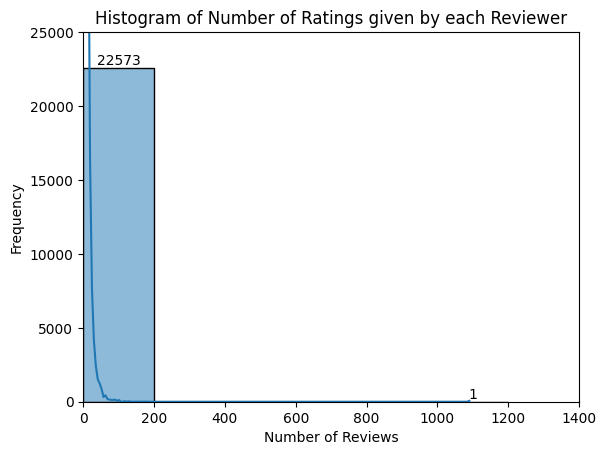

In [39]:
unique_reviewers = final_courses.groupby('reviewers').size().reset_index(name='count_of_reviews')

bin_interval = 200
bin_edges = np.arange(0, unique_reviewers['count_of_reviews'].max() + bin_interval, bin_interval)

ax = sns.histplot(data=unique_reviewers, x='count_of_reviews', bins=bin_edges, kde=True, edgecolor='black', stat='count')

for bin in ax.patches:
    if bin.get_height() > 0:
        ax.annotate(format(bin.get_height(), '.0f'), 
                    (bin.get_x() + bin.get_width() / 2., bin.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5), 
                    textcoords = 'offset points')
    
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Ratings given by each Reviewer')
plt.xlim(0, 1400)
plt.ylim(0, 25000)
plt.show()

### Explore Number of Reviews > 600 and Handle it 

In [40]:
high_review_count = unique_reviewers[unique_reviewers['count_of_reviews'] > 600]
print(high_review_count)
unique_reviewers = unique_reviewers[unique_reviewers['count_of_reviews'] < 600]

      reviewers  count_of_reviews
5137  deleted a              1090


### Remove Reviewers who have > 600 Number of Reviews from final_courses

In [41]:
final_courses = final_courses[~final_courses['reviewers'].isin(high_review_count['reviewers'])]

### Plot New Histogram of Number of Ratings given by each Reviewer

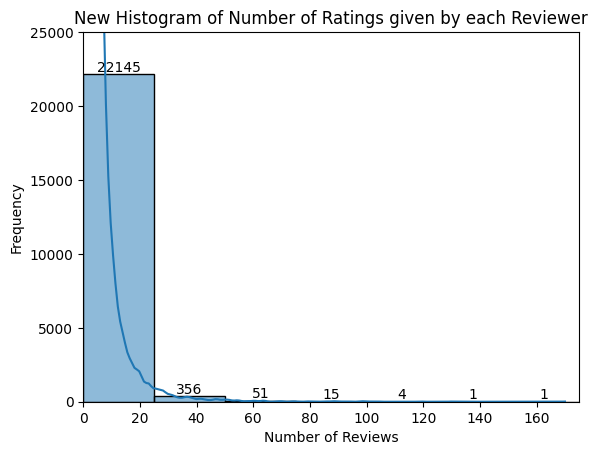

In [42]:
bin_interval = 25
bin_edges = np.arange(0, unique_reviewers['count_of_reviews'].max() + bin_interval, bin_interval)

ax = sns.histplot(data=unique_reviewers, x='count_of_reviews', bins=bin_edges, kde=True, edgecolor='black', stat='count')

for bin in ax.patches:
    if bin.get_height() > 0:
        ax.annotate(format(bin.get_height(), '.0f'), 
                    (bin.get_x() + bin.get_width() / 2., bin.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5), 
                    textcoords = 'offset points')
    
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('New Histogram of Number of Ratings given by each Reviewer')
plt.xlim(0, 175)
plt.ylim(0, 25000)
plt.show()

### New Summary Statistics

In [43]:
print("Count of datapoints: ", final_courses.shape)
print("Count of Unique Reviewers: ", final_courses['reviewers'].nunique())
print("Count of Unique Courses: ", final_courses['name'].nunique())

Count of datapoints:  (134094, 15)
Count of Unique Reviewers:  22573
Count of Unique Courses:  239


In [44]:
final_courses.describe().round(2)

,rating,Overall Ratings,Duration,Num of Reviews,Demeaned Rating,Popularity
count,134094.00,133896.00,134094.00,134094.00,134094.00,133896.00
mean,4.65,4.75,20.20,48.90,0.00,234.61
std,0.75,0.13,10.86,77.11,0.66,365.94
min,1.00,3.90,3.00,0.00,-3.82,4.20
25%,5.00,4.70,11.00,8.00,0.00,36.80
50%,5.00,4.80,19.00,22.00,0.07,100.80
75%,5.00,4.80,26.00,49.00,0.33,235.20
max,5.00,4.90,127.00,980.00,2.80,4704.00


### Histogram of Popularity of each Course

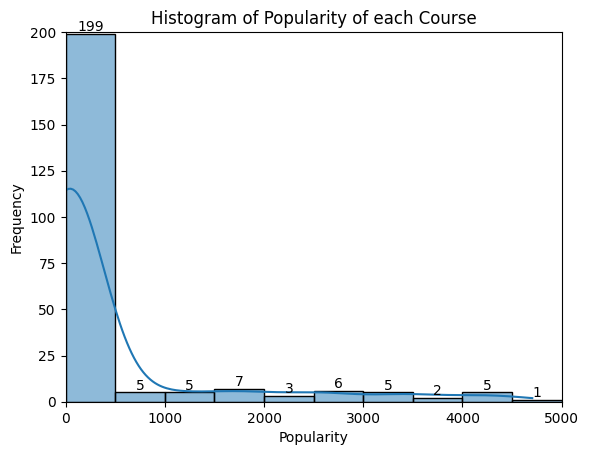

In [45]:
grouped_courses = final_courses.drop_duplicates(subset=['institution', 'name'])

bin_interval = 500
bin_edges = np.arange(0, grouped_courses['Popularity'].max() + bin_interval, bin_interval)

ax = sns.histplot(data=grouped_courses, x='Popularity', bins=bin_edges, kde=True, edgecolor='black', stat='count')

for bin in ax.patches:
    if bin.get_height() > 0:
        ax.annotate(format(bin.get_height(), '.0f'), 
                    (bin.get_x() + bin.get_width() / 2., bin.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5), 
                    textcoords = 'offset points')
    
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Histogram of Popularity of each Course')
plt.xlim(0, 5000)
plt.ylim(0, 200)

plt.show()


### Histogram of Count of Ratings given for each Course

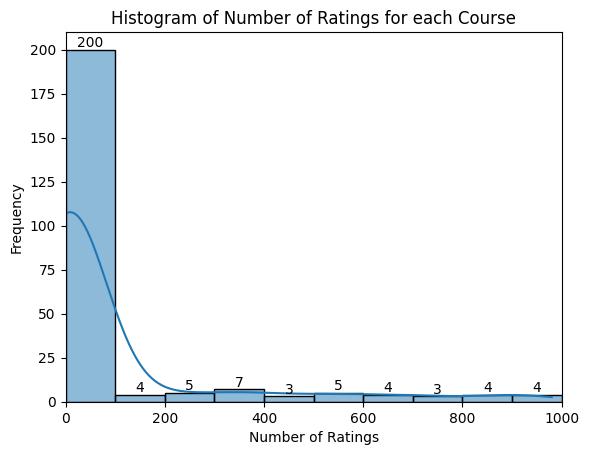

In [46]:
grouped_courses = final_courses.drop_duplicates(subset=['institution', 'name'])

bin_interval = 100
bin_edges = np.arange(0, grouped_courses['Num of Reviews'].max() + bin_interval, bin_interval)

ax = sns.histplot(data=grouped_courses, x='Num of Reviews', bins=bin_edges, kde=True, edgecolor='black', stat='count')

for bin in ax.patches:
    if bin.get_height() > 0:
        ax.annotate(format(bin.get_height(), '.0f'), 
                    (bin.get_x() + bin.get_width() / 2., bin.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5), 
                    textcoords = 'offset points')
    
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Ratings for each Course')
plt.xlim(0, 1000)
plt.ylim(0, 210)

plt.show()

### Histogram of Overall Ratings of each Course


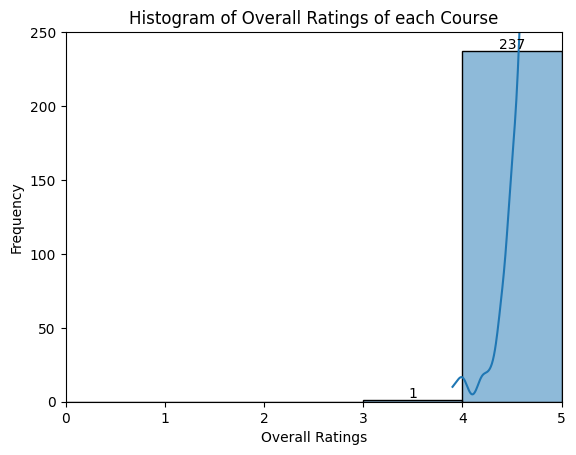

In [47]:
grouped_courses = final_courses.drop_duplicates(subset=['institution', 'name'])

bin_interval = 1
bin_edges = np.arange(0, grouped_courses['Overall Ratings'].max() + bin_interval, bin_interval)

ax = sns.histplot(data=grouped_courses, x='Overall Ratings', bins=bin_edges, kde=True, edgecolor='black', stat='count')

for bin in ax.patches:
    if bin.get_height() > 0:
        ax.annotate(format(bin.get_height(), '.0f'), 
                    (bin.get_x() + bin.get_width() / 2., bin.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5), 
                    textcoords = 'offset points')
    
plt.xlabel('Overall Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Overall Ratings of each Course')
plt.xlim(0, 5)
plt.ylim(0, 250)
plt.show()

### Histogram of Ratings given by Reviewers

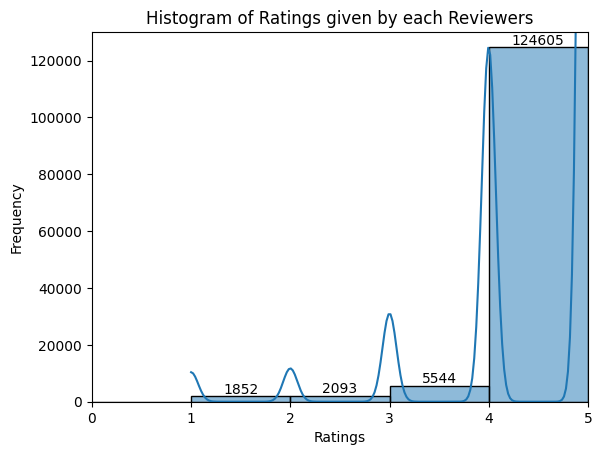

In [48]:
bin_interval = 1
bin_edges = np.arange(0, final_courses['rating'].max() + bin_interval, bin_interval)

ax = sns.histplot(data=final_courses, x='rating', bins=bin_edges, kde=True, edgecolor='black', stat='count')

for bin in ax.patches:
    if bin.get_height() > 0:
        ax.annotate(format(bin.get_height(), '.0f'), 
                    (bin.get_x() + bin.get_width() / 2., bin.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5), 
                    textcoords = 'offset points')
    
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings given by each Reviewers')
plt.xlim(0, 5)
plt.ylim(0, 130000)
plt.show()

### Conclusion
1. Histogram of Overall Ratings for each Course and Histogram of Ratings given by each Reviewer is left skewed, implying that reviewers usually leave positive ratings. 
2. Histogram of Number of Ratings of each Course is right skewed, implying the possibility that not many reviewers would leave ratings. 

Overall, reviewers who leave a rating gave it a high score. There is a possibility that reviewers who are unhappy tend to not leave a rating. 

### Implications
1. It is hard to decipher what reviewers do not like since we do not have data regarding what they gave bad ratings for. 

### Current Solution
1. Use a demeaned rating where a demeaned rating > 0 implies that reviewers "like" the course while a demeaned rating <0 implies that reviewers "less like" the course. 

In [49]:
final_courses.to_csv('final_courses.csv', index=False)
final_jobs.to_csv('final_jobs.csv', index=False)

### Split into Train, Eval and Test Sets